# HEART FAILURE PREDICTIONS


In This dataset we are going to create a model on predicting the heart failure.

 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
heart=pd.read_csv("heart_failure.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Sex - Gender of patient Male = 1, Female =0
Age - Age of patient
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

Now we are going to finding the null values in the data set

In [5]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

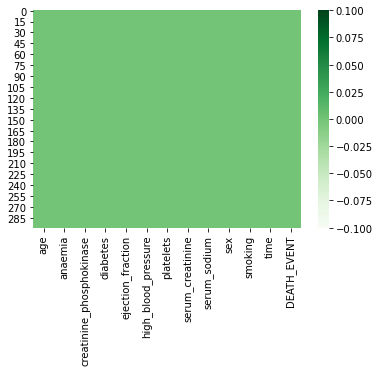

In [6]:
sns.heatmap(heart.isnull(),cmap="Greens")

we notice that there is no null in the dataset and no categorial values

Now we use the visualization techniques to visualize our data and further fitting into models

In [7]:
print("HEART FAILED:",heart.DEATH_EVENT.value_counts()[1])
print("HEART NOT FAILED:",heart.DEATH_EVENT.value_counts()[0])


HEART FAILED: 96
HEART NOT FAILED: 203


([<matplotlib.patches.Wedge at 0x1e5d61bb4c0>,
 [Text(-1.0153497129885487, -0.639581863668813, 'Heart not failed'),
  Text(1.0153497728705203, 0.6395817686049088, ' Heart failed')])

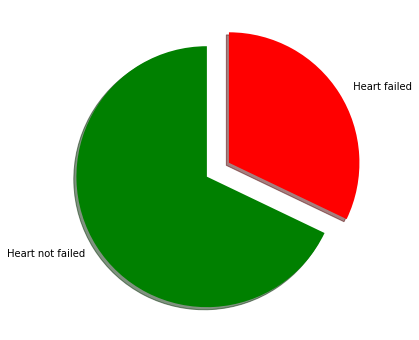

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

plt.pie(x=heart["DEATH_EVENT"].value_counts(),colors=["green","red"],explode = ( 0.1,0.1),labels=["Heart not failed"," Heart failed"],startangle=90,shadow = True)

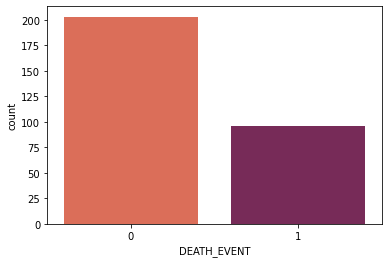

In [9]:
sns.countplot(x='DEATH_EVENT',data=heart,palette='rocket_r')
plt.show()

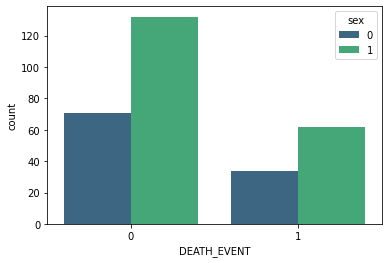

In [10]:
sns.countplot(x='DEATH_EVENT',hue="sex",data=heart,palette='viridis')
plt.show()

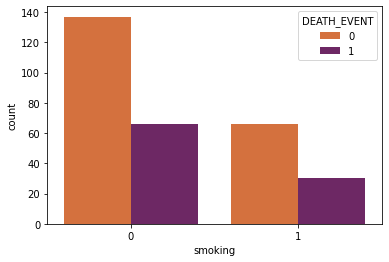

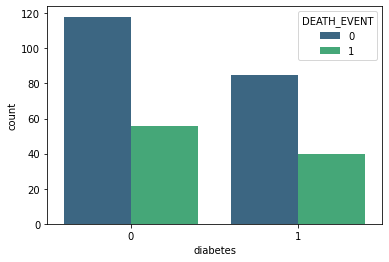

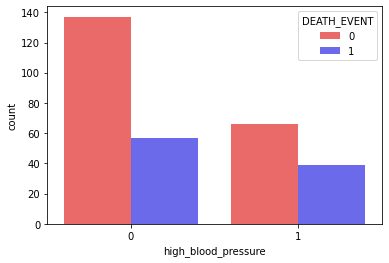

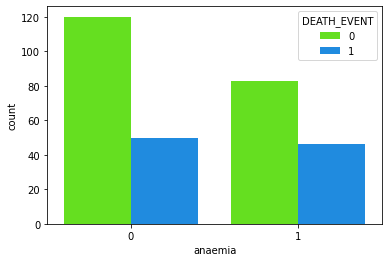

In [11]:
sns.countplot(x='smoking',hue="DEATH_EVENT",data=heart,palette="inferno_r")
plt.show()
sns.countplot(x='diabetes',hue="DEATH_EVENT",data=heart,palette='viridis')
plt.show()
sns.countplot(x='high_blood_pressure',hue="DEATH_EVENT",data=heart,palette='seismic_r')
plt.show()
sns.countplot(x='anaemia',hue="DEATH_EVENT",data=heart,palette='gist_rainbow')
plt.show()



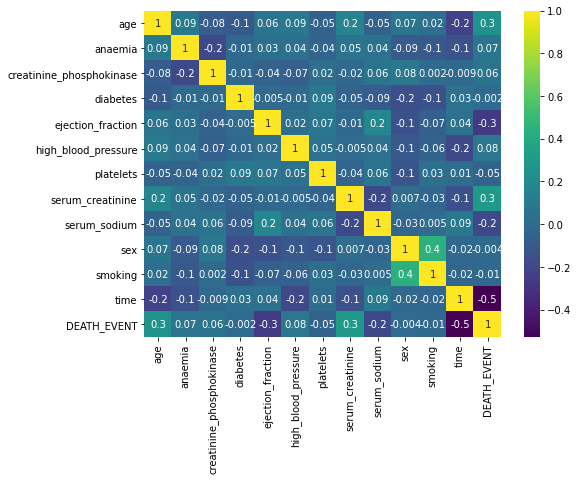

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(heart.corr(), annot=True, fmt='.1g', cmap='viridis');


<AxesSubplot:xlabel='age', ylabel='Count'>

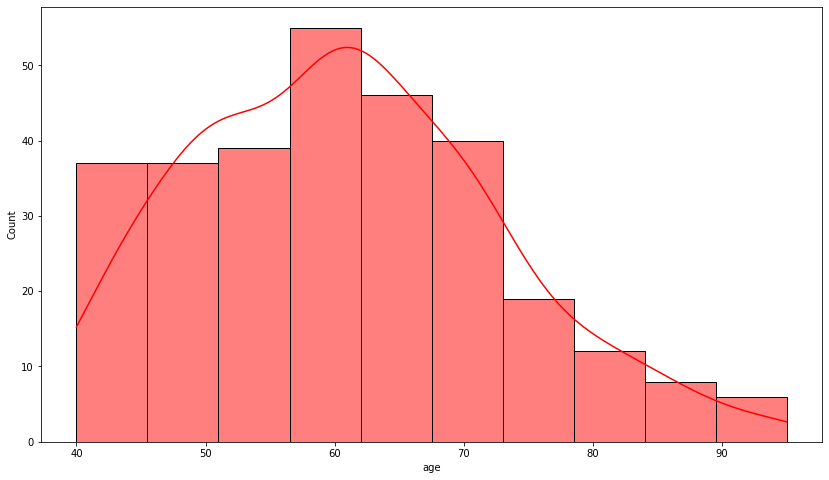

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(x=heart["age"], kde=True, color='red')

Text(0.5, 1.0, 'Male')

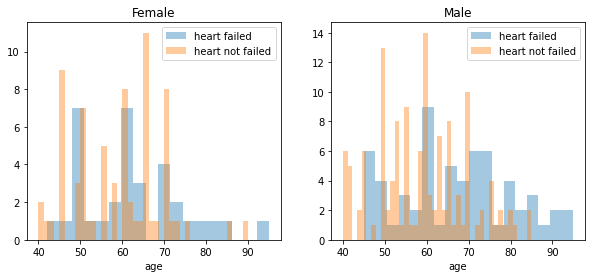

In [14]:
healthy = 'heart not failed'
unhealthy = 'heart failed'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = heart[heart['sex']==0]
men = heart[heart['sex']==1]
ax = sns.distplot(women[women['DEATH_EVENT']==1].age.dropna(), bins=18, label = unhealthy, ax = axes[0], kde =False)
ax = sns.distplot(women[women['DEATH_EVENT']==0].age.dropna(), bins=40, label =healthy, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['DEATH_EVENT']==1].age.dropna(), bins=18, label = unhealthy, ax = axes[1], kde = False)
ax = sns.distplot(men[men['DEATH_EVENT']==0].age.dropna(), bins=40, label =healthy, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

NOW BUILD THE MACHINE LEARNING MODLES

In [15]:
X = heart.drop("DEATH_EVENT", axis=1)
X.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [16]:
Y = heart["DEATH_EVENT"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

Spliting the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8,test_size=0.2, random_state=1)

In [18]:
print("x_train=",X_train)
print("y_train=",y_train)
print("x_test=",X_test)
print("y_test=",y_test)

x_train=       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
161  45.0        1                       130         0                 35   
260  55.0        0                        66         0                 40   
218  68.0        1                      1021         1                 35   
123  60.0        1                       582         0                 30   
39   60.0        0                       235         1                 38   
..    ...      ...                       ...       ...                ...   
203  60.0        0                        59         0                 25   
255  52.0        1                       191         1                 30   
72   85.0        0                      5882         0                 35   
235  77.0        1                       109         0                 50   
37   82.0        1                       855         1                 50   

     high_blood_pressure  platelets  serum_creatinine  serum_sodiu

In [19]:
len(X_train), len(X_test),len(y_train), len(y_test)

(239, 60, 239, 60)

# Logistic regression


In [20]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [21]:
Y_pred = logr.predict(X_test)

In [22]:
LogisticRegressionScore = logr.score(X_test, y_test)

In [23]:


cf = confusion_matrix(y_test, Y_pred)
cf

array([[42,  4],
       [ 4, 10]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for Logistic Regression')

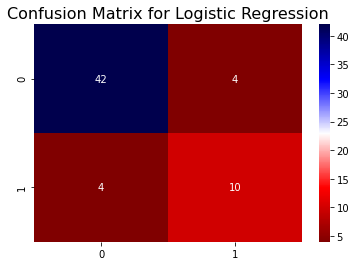

In [24]:
sns.heatmap(cf, annot=True, cmap='seismic_r')
plt.title("Confusion Matrix for Logistic Regression", fontsize=16, y=1)

In [25]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60



In [26]:
acc_log = round(logr.score(X_train, y_train) * 100,4)
print(acc_log)

80.3347


# RANDOM FOREST


In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)



RandomForestClassifier()

In [28]:
Y_prediction = random_forest.predict(X_test)


In [29]:
random_forest.score(X_train, y_train)

1.0

In [30]:
cf = confusion_matrix(y_test, Y_prediction)
cf

array([[44,  2],
       [ 2, 12]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for Random Forest')

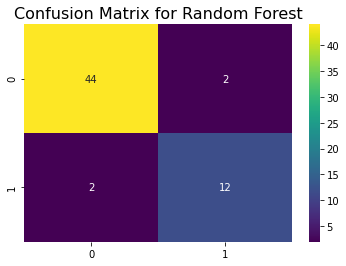

In [31]:
sns.heatmap(cf, annot=True, cmap='viridis')
plt.title("Confusion Matrix for Random Forest", fontsize=16, y=1)

In [32]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.86      0.86      0.86        14

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



In [33]:
acc_forest = round(random_forest.score(X_train, y_train) * 100,4)
print(acc_forest)

100.0


# DECISION TREE

In [34]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
Y_predictions =decision_tree.predict(X_test)


In [36]:
decision_tree.score(X_train, y_train)

1.0

In [37]:
cf = confusion_matrix(y_test, Y_predictions)
cf

array([[41,  5],
       [ 5,  9]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for Decision tree')

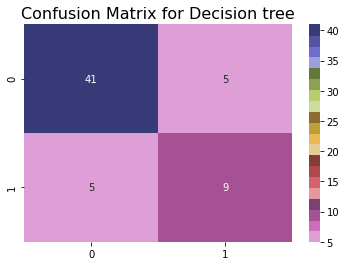

In [44]:
sns.heatmap(cf, annot=True, cmap="tab20b_r")
plt.title("Confusion Matrix for Decision tree", fontsize=16, y=1)

In [39]:
print(classification_report(y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.64      0.64      0.64        14

    accuracy                           0.83        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.83      0.83      0.83        60



In [40]:
acc_decision = round(random_forest.score(X_train, y_train) * 100,4)
print(acc_decision)

100.0


In these three models let us see which one is the best model for this dataset

In [41]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [  acc_log, 
              acc_forest, 
              acc_decision]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.0000,Random Forest
100.0000,Decision Tree
80.3347,Logistic Regression


In the above table we observed that Random Forest and Decision Tree are more accurate than LogisticRegression

# K-FOLD CROSS VALIDATION

In the above observations Random Forest and Decision Tree got 100% accuracy

Let validate our Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.79166667 0.875      0.875      0.875      0.83333333
 0.875      0.70833333 0.875      0.7826087 ]
Mean: 0.8324275362318841
Standard Deviation: 0.05348499869184033


In our model Random Forest has average accuracy 83% with a standard deviation 5%

In [43]:
df = DecisionTreeClassifier()
scores = cross_val_score(df, X_train,y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79166667 0.79166667 0.75       0.70833333 0.75       0.70833333
 0.66666667 0.66666667 0.79166667 0.82608696]
Mean: 0.745108695652174
Standard Deviation: 0.053027748221996795


In our model Decision Tree  has average accuracy 75% with a standard deviation 6%

# CONCLUSION

We select the dataset about heart failure .Firstly we import all the required libraries and then we perform th data cleaning process by checking the null values after that we tried to visualize our data with some visualization techniques for better undestanding of the dataset after that we create models for predicting the heart failure we create model by using logisticregression ,random forest and decision tree.we got 100% accuracy in random forest and decision tree and logistic regression has 80% accuracy and then we apply cross validation on random forest and decision tree.